# **Preparing our data for image classification**

Given that we are covering multiple scenarios in this chapter, in order for us to see the advantage of one scenario over the other, we will work on a single dataset throughout this chapter – the Fashion MNIST dataset. Let's prepare this dataset.

Start by downloading the dataset and importing the relevant packages.The torch vision package contain various datasets- one of which is the FashionMNIST dataset , which we will be working oon this chapter..

In [1]:
from torchvision import datasets
import torch
data_folder ='~/data/FMNIST' # this can be any directory.
# you want to download FMNISt to
fmnist = datasets.FashionMNIST(data_folder, download=True, \
                               train=True)


Extracting /root/data/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/data/FMNIST/FashionMNIST/raw




Extracting /root/data/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/data/FMNIST/FashionMNIST/raw




Extracting /root/data/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/FMNIST/FashionMNIST/raw




Extracting /root/data/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/FMNIST/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In the preceding code, we are specifying the folder (data_folder) where we want to store the downloaded dataset. Next, we are fetching fmnist data from datasets.FashionMNIST and are storing it in data_folder. Furthermore, we are specifying that we only want to download the training images by specifying train = True

# Next, we must store the images that are available in fmnist.data as tr_images and the labels (targets) that are available in fmnist.targets as tr_targets:

In [2]:
tr_images = fmnist.data
tr_targets = fmnist.targets

# Inspect the tensors that we are dealing with:

In [3]:
unique_values = tr_targets.unique()
print(f'tr_images & tr_targets :\n\tX -{tr_images.shape}\n\tY \
-{tr_targets.shape}\n\ty\-unique Values :{unique_values}')
print(f'TASK :\n\t{len(unique_values)} class classification')
print(f'UNIQUE CLASSES:\n\t{fmnist.classes}') 

tr_images & tr_targets :
	X -torch.Size([60000, 28, 28])
	Y -torch.Size([60000])
	y\-unique Values :tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TASK :
	10 class classification
UNIQUE CLASSES:
	['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Here, we can see that there are 60,000 images each of 28 x 28 in size and with 10 possible classes across all the images. Note that tr_targets contains the numeric values for each class, while fmnist.classes gives us the names that correspond to each numeric value in tr_targets.

# **Plot a random sample of 10 images for all the 10 possible classes:**

Import the relevant packages in order to plot a grid of images and so that you can also work on arrays:

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Create a plot where we can show a 10 x 10 grid, where each row of the grid corresponds to a class and each column presents an example image belonging to the row's class. Loop through the unique class numbers (label_class) and fetch the indices of rows (label_x_rows) corresponding to the given class number:

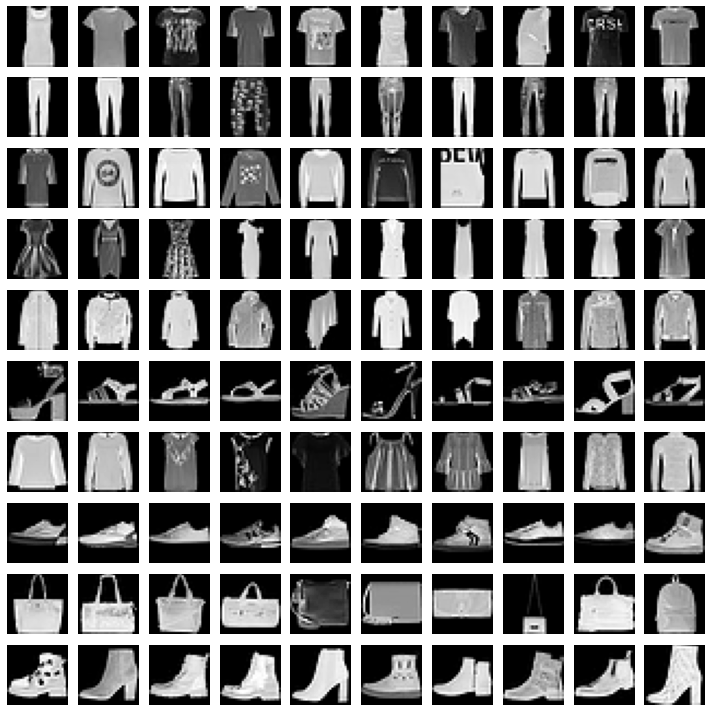

In [6]:
R, C = len(tr_targets.unique()), 10
fig, ax = plt.subplots(R, C, figsize=(10,10))
for label_class, plot_row in enumerate(ax):
    label_x_rows = np.where(tr_targets == label_class)[0]
    for plot_cell in plot_row:
        plot_cell.grid(False); plot_cell.axis('off')
        ix = np.random.choice(label_x_rows)
        x, y = tr_images[ix], tr_targets[ix]
        plot_cell.imshow(x, cmap='gray')
plt.tight_layout()

Note that in the preceding code, we are fetching the 0th index as the output of the np.where condition as it has a length of 1. It contains an array of all the indices where the target value (tr_targets) is equal to label_class.


Loop through 10 times to fill the columns of a given row. Furthermore, we need to select a random value (ix) from the indices corresponding to a given class that were obtained previously (label_x_rows) and plot them.

Note that in the preceding image,each row represents a smaple of  10 diferent images all belonging of same class 